# 1. Finite difference method
This method is used to solve 2nd order differential equation(mainly boundary value problem) using discrete grid.
## Numerical differentiation
* First order derivative(Central difference):
$$f'(x_0) = \frac{f(x_0+h)-f(x_0-h)}{2h}$$
* Second order derivative:
$$f''(x_0) = \frac{f(x_0-h)-2f(x_0)+f(x_0+h)}{h^2}$$

# A general second order differential equation
$$\boxed{y''(x) + p(x)y'(x)+q(x)y(x) = r(x)}$$
Boundary conditions are   $y(x_0) = y_0 \hspace{2mm}y(x_{N-1})= y_{N-1}$. There is $N$ of grids. The above differential equation can be written as,
.

.

.

.

.

.

.

.

# Problem:
Given Legendre's equation: $(1 - x^2)y'' - 2xy' + 12y = 0$.
1. Solve the equation by *finite difference method* with the boundary conditions: $y(0.95) = -y(-0.95)=0.7184375$
2. Analytical solution of this ODE is $y(x) = \frac{1}{2}(5x^3 - 3x)$. Plot numerical solution slong with analytic solution.
3. Let, $\tilde{y}(x_i)$ be the numerical solution of the ODE on discrete $x_i$ points, and $y(x_i)$ be the analytic solution on those points. Define an error term $$e = \left(\frac{1}{N} \sum_{i = 0}^{N-1} (y(x_i) - \tilde{y}(x_i))^2\right)^{1/2}$$ study the variation of $e$ with the numbers of points $N$ considered in finite difference method.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', "notebook", "grid"])

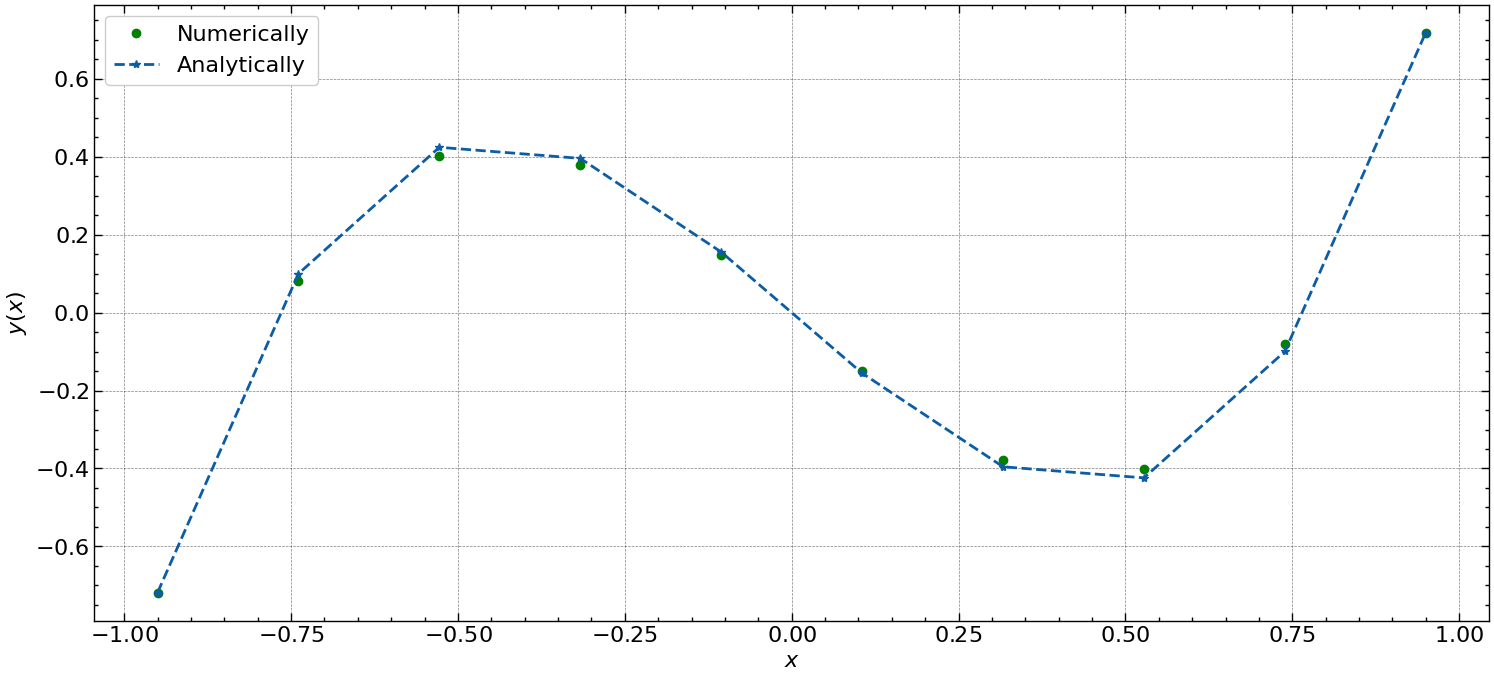

In [3]:
def Solution(N):
    x, h = np.linspace(-0.95, 0.95, N, retstep=True)

    # Null matrices
    A = np.zeros((N, N))
    b = np.zeros((N))

    # Tridiagonal matrix
    for i in range(1, N-1):
        A[i][i-1] = (1 - x[i]**2)/h**2 + x[i]/h
        A[i][i] = 12 - 2*(1 - x[i]**2)/h**2
        A[i][i+1] = (1 - x[i]**2)/h**2 - x[i]/h

    # Boundary values
    A[0][0], A[-1][-1] = 1, 1
    b[0], b[-1] = -0.7184375, 0.7184375

    # Solve the linear equations
    return np.linalg.solve(A, b)
N = 10
x, h = np.linspace(-0.95, 0.95, N, retstep=True)
# Plotting
plt.figure(figsize=(18, 8))
plt.plot(x, Solution(N), "og", label = "Numerically")
plt.plot(x, 0.5*(5*x**3 - 3*x), "--*",label = "Analytically")
plt.xlabel(r"$x$", size = 16); plt.ylabel(r"$y(x)$", size = 16)
plt.legend()
plt.show()

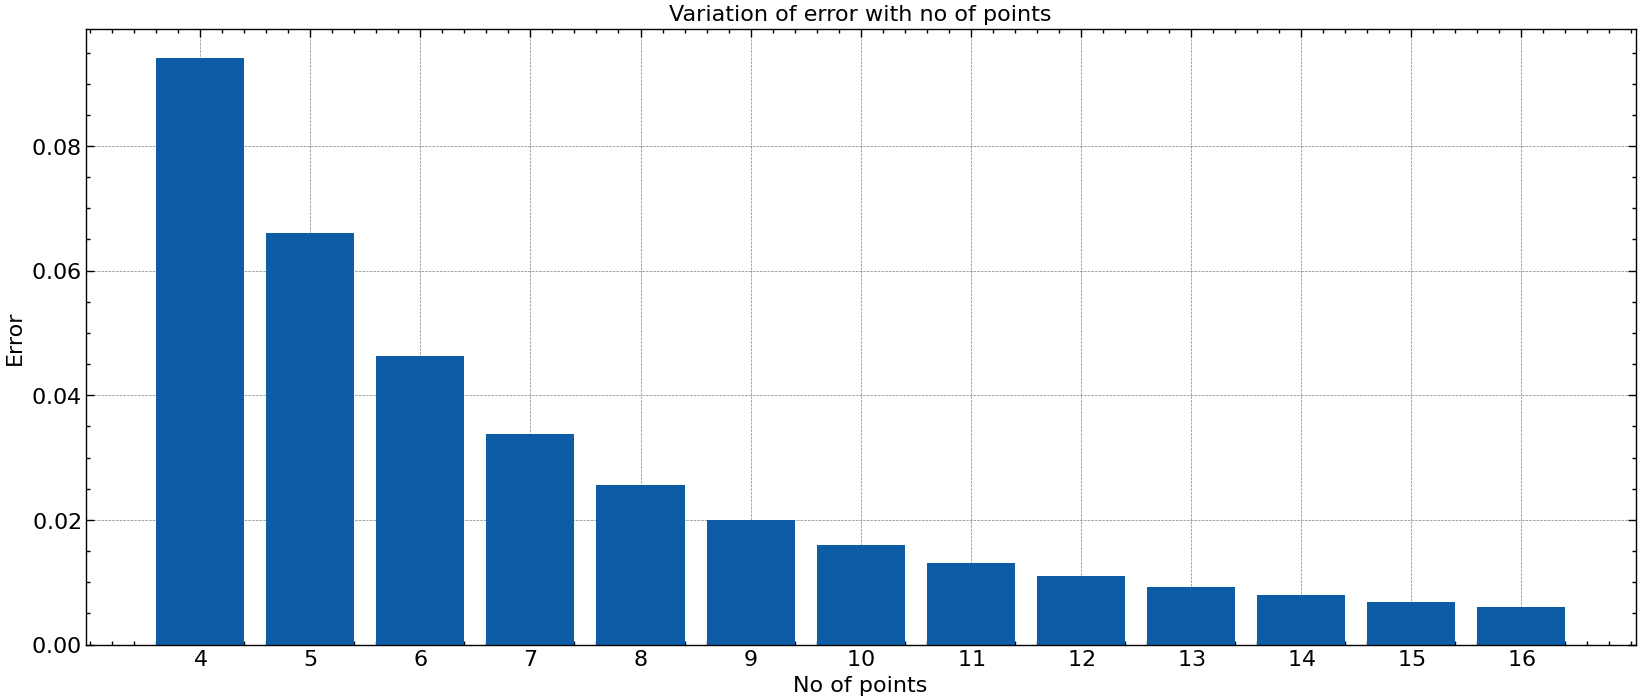

In [4]:
N = np.linspace(4, 16, 13)
E = []
for i in N:
    x = np.linspace(-0.95, 0.95, int(i))
    y = 0.5*(5*x**3 - 3*x)
    e = (sum((y - Solution(int(i)))**2)/int(i))**0.5
    E.append(e)

# Plotting
plt.figure(figsize=(20, 8))
plt.title("Variation of error with no of points")
plt.bar(N, E)
plt.xticks(N)
plt.xlabel("No of points")
plt.ylabel("Error")
plt.show()

# 2. Shooting Method
This method is used for solving 2nd order DE for given boundary condition. It is based on **uniqueness theorem**.

## Problem 1:
Solve the Legendre's differential equation $(1-x^2)y'' -2xy'+l(l+1)y = 0$ using shooting method.
1. For $l = 3$ boundary condition $y(0.95) = -y(-0.95) =0.71843$
2. For $l = 4$ boundary condition $y(0.95) = y(-0.95) =0.55408$

In [5]:
def Ledengre(xi, xf, N, l, B):  #B for boundary value at x < 0
    x, h = np.linspace(xi, xf, N, retstep=True)
    y = np.zeros((N)); yp = np.zeros((N))
    y[0] = B
    m = -10
    while m <= 5:
        yp[0] = m
        #Euler method
        for i in range(N-1):
            y[i+1] = y[i] + h*yp[i]
            yp[i+1] = yp[i] + h*(2*x[i]*yp[i] - l*(l+1)*y[i])/(1 - x[i]**2)
        # Tolerance
        if abs(y[0]*(-1)**l - y[-1]) < 0.01:
            break
        m += 0.001
    return x, y


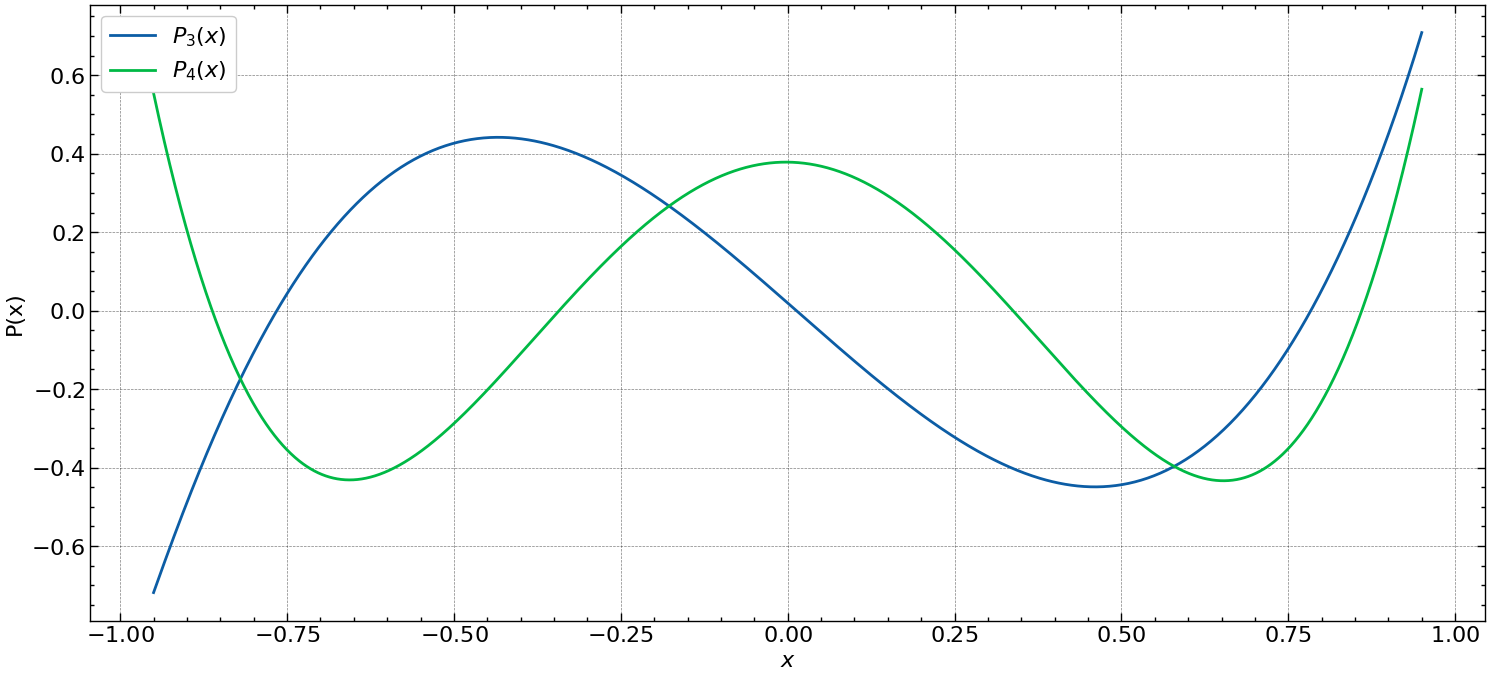

In [6]:
xi, xf, N = -0.95, 0.95, 1000

x1, y1 = Ledengre(xi, xf, N, 3, -0.71843)
x2, y2 = Ledengre(xi, xf, 4000, 4, 0.55408)

plt.figure(figsize=(18, 8))
plt.plot(x1, y1, label = r"$P_3(x)$")
plt.plot(x2, y2, label = r"$P_4(x)$")
plt.legend(loc = "best")
plt.xlabel(r"$x$"); plt.ylabel(r"P(x)")
plt.show()

## Problem 2:
Solve the Hermite's differential equation $y'' - 2xy' + 2ny = 0$
1. For n = 2 boundary conditions $y(0) = 2$ and $y(2) = 14$.
2. For n = 3 boundary conditions $y(0) = 0$ and $y(2) = 40$

In [7]:
def Hermite(xi, xf, N, n, yi, yf):  #B for boundary value at x < 0
    x, h = np.linspace(xi, xf, N, retstep=True)
    y = np.zeros((N)); yp = np.zeros((N))
    y[0] = yi
    m = -20
    while m <= 4:
        yp[0] = -12
        #Euler method
        for i in range(N-1):
            y[i+1] = y[i] + h*yp[i]
            yp[i+1] = yp[i] + h*(2*x[i]*yp[i] - 2*n*y[i])
        # Tolerance
        if abs(abs(yf) - abs(y[-1])) < 0.01:
            break
        m += 0.001
    return x, y


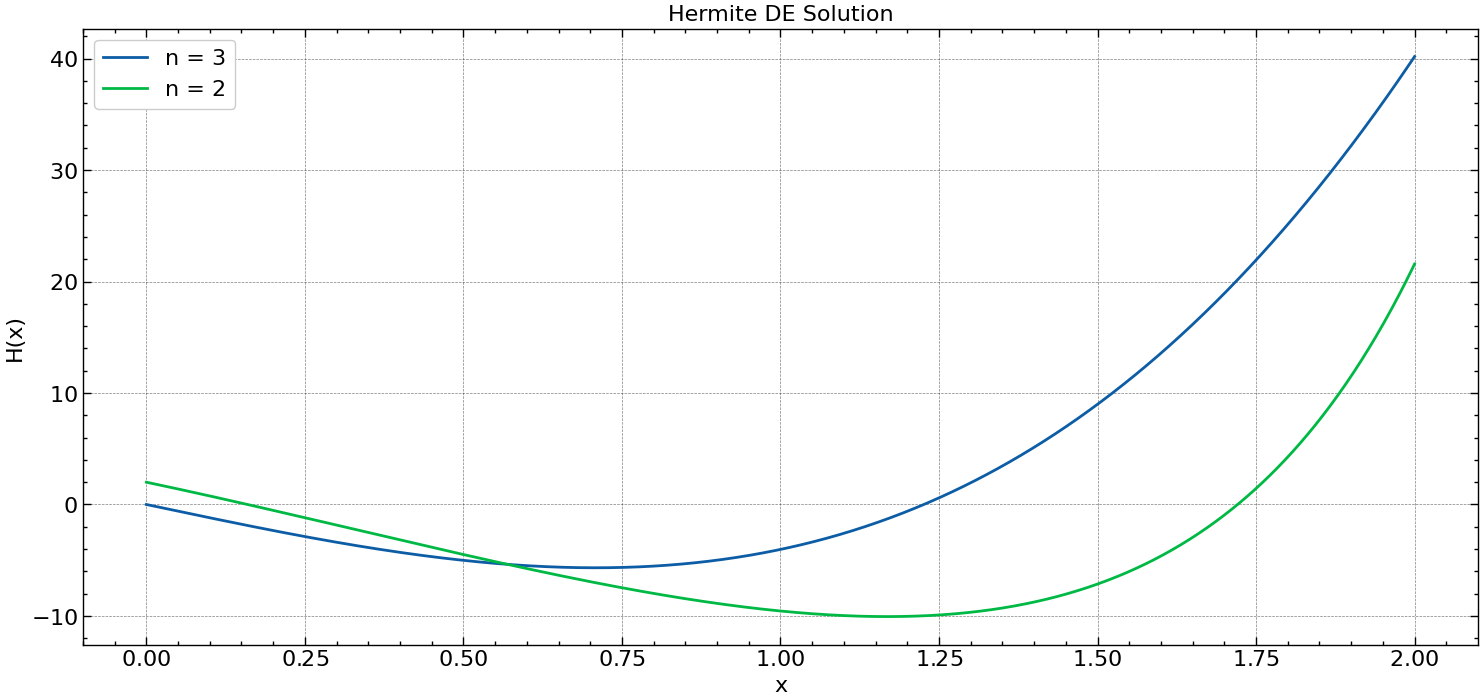

In [8]:
xi, xf, N = 0, 2, 1000

x1, y1 = Hermite(xi, xf, N, 3, 0, 40)
x2, y2 = Hermite(xi, xf, N, 2, 2, 14)

plt.figure(figsize=(18, 8))
plt.title("Hermite DE Solution")
plt.plot(x1, y1, label = r"n = 3")
plt.plot(x2, y2, label = r"n = 2")
plt.legend()
plt.xlabel(r"x"); plt.ylabel(r"H(x)")
plt.show()

# Schrodinger equation(1D space)
## Time dependent:
Time evolution equation of wave function $\Psi(x, t)$
$$\boxed{i\hbar \frac{\partial \Psi}{\partial t} = \frac{-\hbar^2}{2m}\frac{\partial^2 \Psi}{\partial x^2}+V\Psi}$$
Using the method, *separation of variable*(using $\Psi(x, t) = \psi(x)\phi(t)$) we get the time independent Schrodinger equation(namely Eigen value equation),
$$\hat H \psi = E\psi$$
## Time independent Schrodinger equation:
$$\boxed{\frac{-\hbar^2}{2m}\frac{d^2 \psi_n}{d x^2}+V\psi_n = E_n\psi_n}$$
* Note: The small $\psi = \psi(x)$ is called Eigen states.
The **Wobble factor** is $\phi(t) = e^{-iE_nt/\hbar}$

So $$\boxed{\Psi(x, t) = \psi(x)e^{-iE_nt/\hbar}}$$

## 1. Particle in a box
Potential form:
$$V(x) = \begin{cases} 0 & \text{if $|x|<a$}\\
\infty & \text{else} \end{cases}$$
Time independent Schrodinger equation for the case of $|x| < a
$:
$$\frac{d^2\psi}{dx^2} = -\frac{2mE}{\hbar^2}\psi$$

In [9]:
h = 1; m = 1
a = 1
V = 0

N = 2000
x, dx = np.linspace(-a, a, N, retstep = True)
psi = np.zeros(N); psi[0] = 0
DpsiDt = np.zeros(N); DpsiDt[0] = 1 #It's kind of random

# Next task: Find the all eigen energies.
E = 0; En = []
psi[-1] = 1 #Assigning this value grater than  0.001.
print("Eigen energies are: ")
while E <= 20: #Eigeplt.usen energies upto 150.
    E += .001

    for i in range(N-1):
        psi[i+1] = psi[i] + dx*DpsiDt[i]
        DpsiDt[i+1] = DpsiDt[i] + dx*(-2*m*E/h**2)*psi[i]

    #Finding the eigen values
    if abs(psi[-1]) <= 0.001:
        En.append(E)
        print(E)
        E += 1 # this is another random, as we know two eigen
               #energies  do not differ from 1.

Eigen energies are: 


1.232999999999975
4.93000000000009
11.092999999999067
19.72100000000145


In [10]:
def integrate(y, x): # y is an array
    h = x[1] - x[0]
    return 0.5*h*(y[0]+y[-1]+2*sum(y[1:-1]))

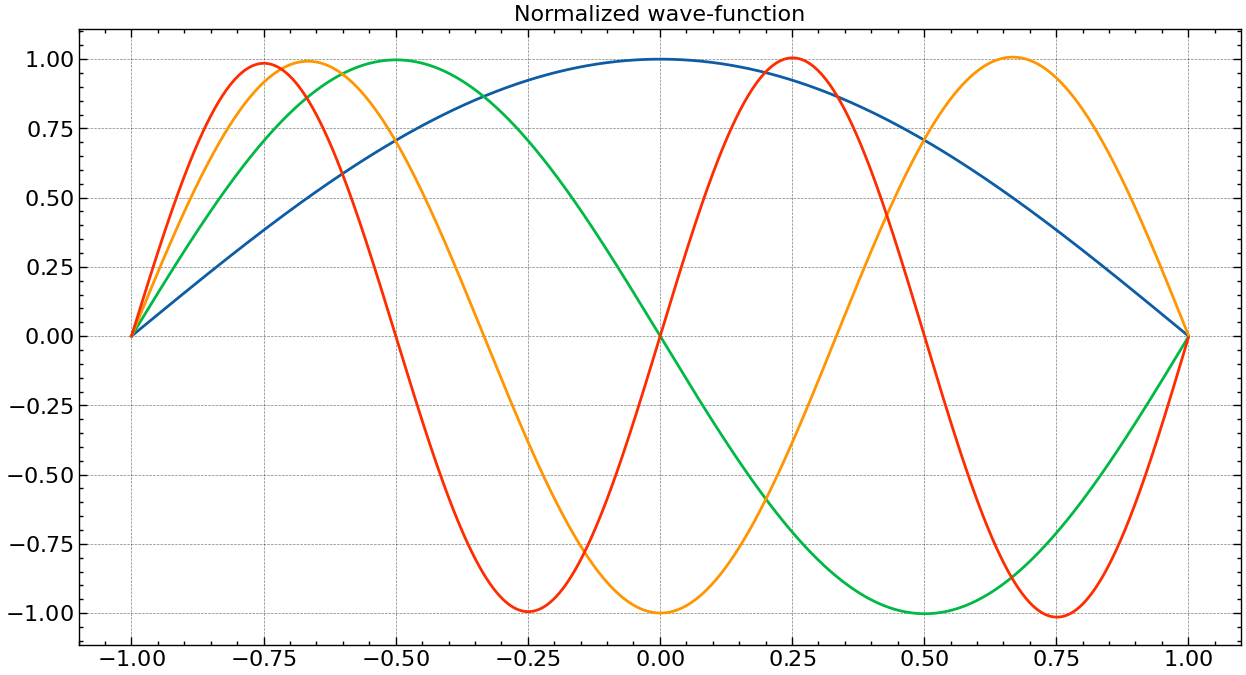

In [11]:
plt.figure(figsize = (15, 8))
for E in En:
    for i in range(N-1):
        psi[i+1] = psi[i] + dx*DpsiDt[i]
        DpsiDt[i+1] = DpsiDt[i] + dx*(-2*m*E/h**2)*psi[i]
    Norm = np.sqrt(1/integrate(psi*psi, x))
    psiN = Norm*(psi)
    plt.plot(x, psiN)
plt.title("Normalized wave-function")
plt.show()

# 2. Step potential
The potential is in the form of $$V(x) = \begin{cases} 0 & \text{if $x < 0$}\\V_0 & \text{if $x>0$}\end{cases}$$

In [18]:
h = 1; m = 1
a = 3
V = 20

N = 2000
x, dx = np.linspace(-a, a, N, retstep = True)
psi = np.zeros(N); psi[0] = 0
DpsiDt = np.zeros(N); DpsiDt[0] = 1 #It's kind of random

# Next task: Find the all eigen energies.
E = 0; En = []
psi[-1] = 1 #Assigning this value grater than  0.001.
print("Eigen energies are: ")
while E <= 20: 
    E += .001

    for i in range((N-1)//2):
        psi[i+1] = psi[i] + dx*DpsiDt[i]
        DpsiDt[i+1] = DpsiDt[i] + dx*(-2*m*E/h**2)*psi[i]

    for i in range((N-1)//2, N-1):
        psi[i+1] = psi[i] + dx*DpsiDt[i]
        DpsiDt[i+1] = DpsiDt[i] + dx*(-2*m*(E + V)/h**2)*psi[i]

    #Finding the eigen values
    if abs(psi[-1]) <= 0.001:
        En.append(E)
        print(E)
        E += 1 # this is another random, as we know two eigen
               #energies  do not differ from 1.

Eigen energies are: 
0.5270000000000004
1.8979999999999595
3.2879999999999168
5.292000000000252
8.302000000000655
10.965999999999733
14.11699999999854
18.0060000000005


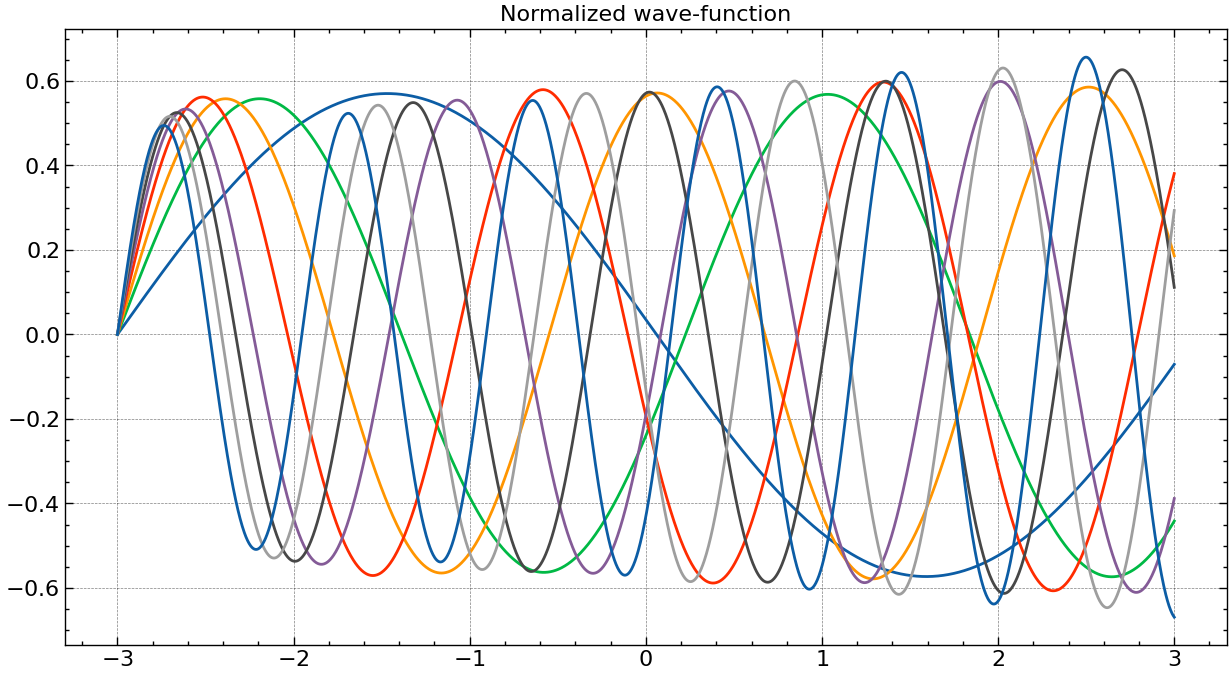

In [19]:
plt.figure(figsize = (15, 8))
for E in En:
    for i in range(N-1):
        psi[i+1] = psi[i] + dx*DpsiDt[i]
        DpsiDt[i+1] = DpsiDt[i] + dx*(-2*m*E/h**2)*psi[i]
    Norm = np.sqrt(1/integrate(psi*psi, x))
    psiN = Norm*(psi)
    plt.plot(x, psiN)
plt.title("Normalized wave-function")
plt.show()

# MonteCarlo Simulation

## 1. Area of a circle

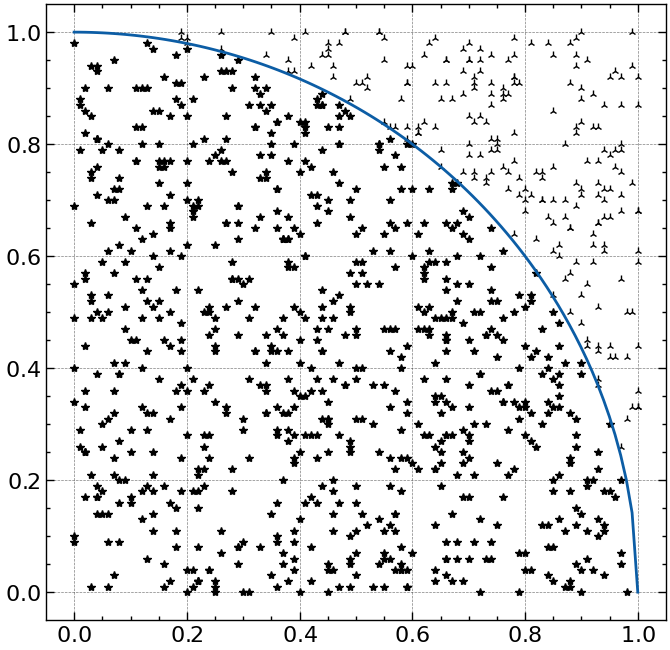

Area under the circle is 0.776


In [67]:
plt.figure(figsize = (8, 8))
N = 1000 #Number of experiment
x = np.random.choice(np.arange(0, 1.01, 0.01),size = (N, 2))
X = x.T[0]; Y = x.T[1]

count = 0
for i in range(N):
    if (X[i]**2 + Y[i]**2) <= 1:
        count += 1
        plt.plot(X[i], Y[i], "k*")
    else:
        plt.plot(X[i], Y[i],"k2")

a = np.linspace(0, 1, 100)
b = np.sqrt(1 - a**2)
plt.plot(a, b)
plt.show()
print("Area under the circle is", count/N)

## 2. Area of Gaussian curve

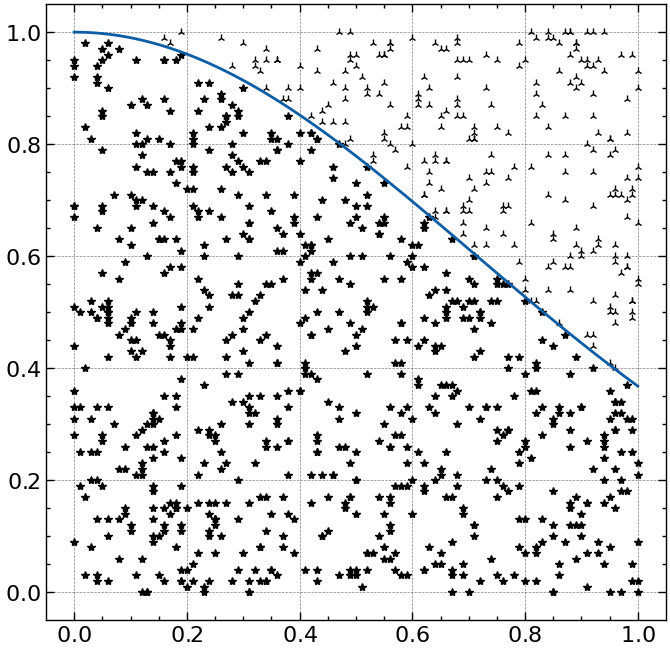

Area under the circle is 0.749


In [72]:
plt.figure(figsize = (8, 8))
N = 1000 #Number of experiment
x = np.random.choice(np.arange(0, 1.01, 0.01),size = (N, 2))
X = x.T[0]; Y = x.T[1]

count = 0
for i in range(N):
    if Y[i] <= np.exp(-X[i]**2):
        count += 1
        plt.plot(X[i], Y[i], "k*")
    else:
        plt.plot(X[i], Y[i],"k2")

a = np.linspace(0, 1, 100)
b = np.exp(-a**2)
plt.plot(a, b)
plt.show()
print("Area under the Gaussian is", count/N)